<a href="https://colab.research.google.com/github/anioki/ML_training_projects/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wine/winequality-red.csv', encoding="ISO-8859-1")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#Data Observation and Preprocessing

In [4]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


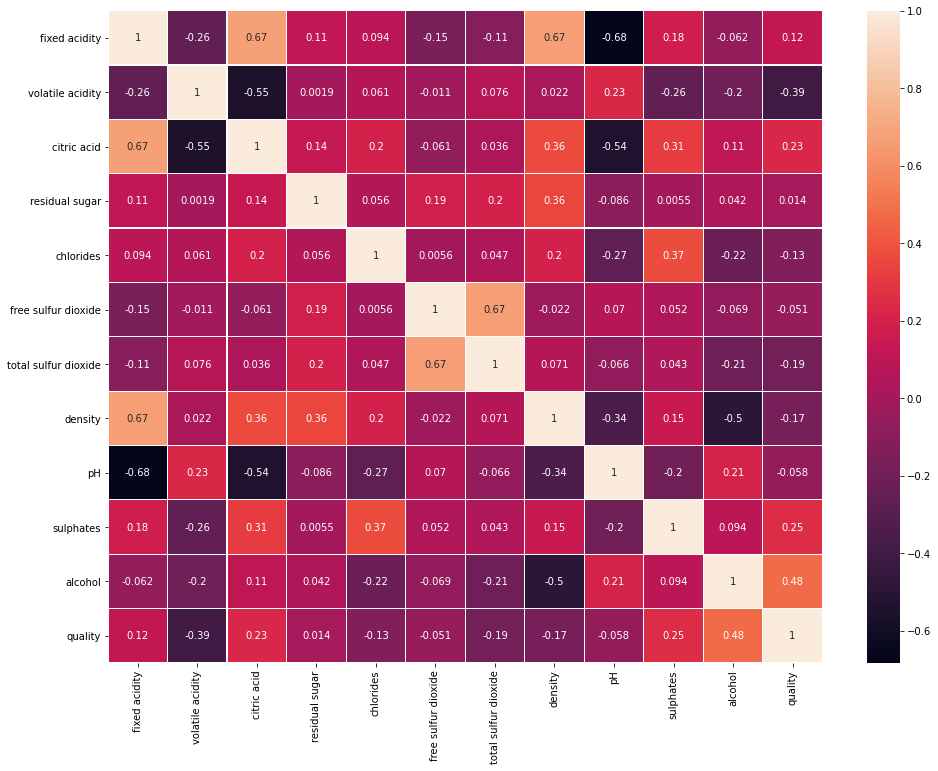

In [7]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True,linewidths=0.25,vmax=1.0,)
plt.show()

In [8]:
df.drop(['pH', 'residual sugar','free sulfur dioxide'], axis = 1, inplace = True)

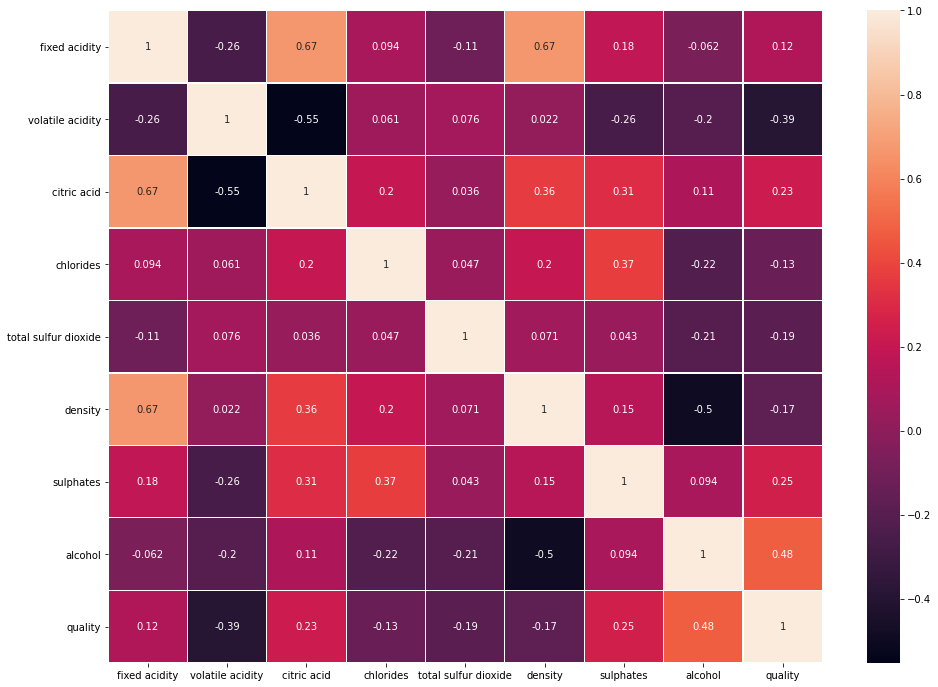

In [9]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True,linewidths=0.25,vmax=1.0,)
plt.show()

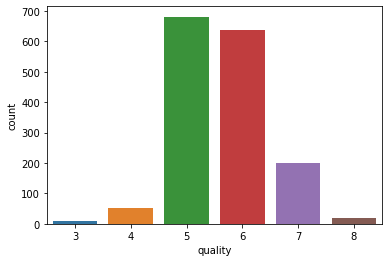

In [10]:
sns.countplot(data=df, x='quality')

In [11]:
y = df['quality'] 
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [12]:
df.drop(['quality'], axis = 1, inplace = True)

In [13]:
name = df.columns
name

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')

In [14]:
from sklearn import preprocessing
x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = name

In [15]:
df

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.247788,0.397260,0.00,0.106845,0.098940,0.567548,0.137725,0.153846
1,0.283186,0.520548,0.00,0.143573,0.215548,0.494126,0.209581,0.215385
2,0.283186,0.438356,0.04,0.133556,0.169611,0.508811,0.191617,0.215385
3,0.584071,0.109589,0.56,0.105175,0.190813,0.582232,0.149701,0.215385
4,0.247788,0.397260,0.00,0.106845,0.098940,0.567548,0.137725,0.153846
...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.130217,0.134276,0.354626,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.083472,0.159011,0.370778,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.106845,0.120141,0.416300,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.105175,0.134276,0.396476,0.227545,0.276923


In [16]:
df['quality'] = y
df

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.106845,0.098940,0.567548,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.143573,0.215548,0.494126,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.133556,0.169611,0.508811,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.105175,0.190813,0.582232,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.106845,0.098940,0.567548,0.137725,0.153846,5
...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.130217,0.134276,0.354626,0.149701,0.323077,5
1595,0.115044,0.294521,0.10,0.083472,0.159011,0.370778,0.257485,0.430769,6
1596,0.150442,0.267123,0.13,0.106845,0.120141,0.416300,0.251497,0.400000,6
1597,0.115044,0.359589,0.12,0.105175,0.134276,0.396476,0.227545,0.276923,5


In [17]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, train_size =0.8, random_state = 3)
train_data

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
606,0.424779,0.198630,0.48,0.100167,0.049470,0.530837,0.275449,0.584615,7
362,0.646018,0.315068,0.66,0.100167,0.109541,0.670338,0.137725,0.246154,5
533,0.504425,0.102740,0.24,0.100167,0.095406,0.406021,0.197605,0.676923,6
1397,0.238938,0.321918,0.26,0.113523,0.346290,0.423642,0.113772,0.230769,5
733,0.212389,0.226027,0.34,0.116861,0.233216,0.582232,0.161677,0.169231,5
...,...,...,...,...,...,...,...,...,...
789,0.353982,0.349315,0.17,0.145242,0.399293,0.582232,0.113772,0.138462,5
256,0.424779,0.150685,0.37,0.105175,0.024735,0.582232,0.173653,0.123077,5
968,0.389381,0.191781,0.43,0.093489,0.141343,0.310573,0.161677,0.584615,6
952,0.318584,0.130137,0.40,0.076795,0.014134,0.388399,0.209581,0.430769,7


In [18]:
train_data_x, train_data_y, test_data_x, test_data_y = train_data[name], train_data['quality'], test_data[name], test_data['quality']

#Models

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
LR = LinearRegression(normalize = True, copy_X= True)
LR.fit(train_data_x,train_data_y)
LRscore = LR.score(test_data_x, test_data_y)
LRscore

0.3813028234381225

In [23]:
KNR = KNeighborsRegressor()
KNR.fit(train_data_x,train_data_y)
KNRscore = KNR.score(test_data_x, test_data_y)
KNRscore

0.333847662634848

In [24]:
SVR = SVR()
SVR.fit(train_data_x,train_data_y)
SVRscore = SVR.score(test_data_x, test_data_y)
SVRscore

0.42109176497320694

In [25]:
RFR = RandomForestRegressor()
RFR.fit(train_data_x,train_data_y)
RFRscore = RFR.score(test_data_x, test_data_y)
RFRscore

0.5421709055246813

In [26]:
DTR = DecisionTreeRegressor()
DTR.fit(train_data_x,train_data_y)
DTRscore = DTR.score(test_data_x, test_data_y)
DTRscore

0.06897678980058841

In [27]:
DTC = DecisionTreeClassifier()
DTC.fit(train_data_x,train_data_y)
DTCscore = DTC.score(test_data_x, test_data_y)
DTCscore

0.6625

In [28]:
ETC =  ExtraTreesClassifier()
ETC.fit(train_data_x,train_data_y)
ETCscore = ETC.score(test_data_x, test_data_y)
ETCscore

0.696875

#SMOTE

In [31]:
import imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy = {5: 2000, 6: 2000, 7: 2000, 4: 2000, 8: 2000, 3: 2000})
X_smote, y_smote = oversample.fit_resample(df[name], df['quality'])
df_smote = pd.DataFrame(X_smote)
df_smote.columns = name
df_smote['quality'] = y_smote
df_smote

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (2000) in class 5 will be larger than the number of samples in the majority class (class #5 -> 681)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (2000) in class 6 will be larger than the number of samples in the majority class (class #5 -> 681)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (2000) in class 7 will be larger than the number of samples in the majority class (class #5 -> 681)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (2000) in class 4 will be larger than the number of samples in the majority class (class #5 -> 681)
  n_samples

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.247788,0.397260,0.000000,0.106845,0.098940,0.567548,0.137725,0.153846,5
1,0.283186,0.520548,0.000000,0.143573,0.215548,0.494126,0.209581,0.215385,5
2,0.283186,0.438356,0.040000,0.133556,0.169611,0.508811,0.191617,0.215385,5
3,0.584071,0.109589,0.560000,0.105175,0.190813,0.582232,0.149701,0.215385,6
4,0.247788,0.397260,0.000000,0.106845,0.098940,0.567548,0.137725,0.153846,5
...,...,...,...,...,...,...,...,...,...
11995,0.234556,0.174625,0.307476,0.081040,0.076813,0.331588,0.248417,0.450037,8
11996,0.535381,0.156212,0.531158,0.097473,0.035472,0.521227,0.197859,0.404158,8
11997,0.480034,0.172959,0.484959,0.095754,0.030788,0.475307,0.199323,0.434647,8
11998,0.290237,0.191383,0.348839,0.083182,0.052109,0.357093,0.237135,0.476030,8


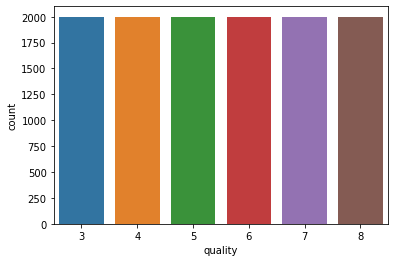

In [32]:
sns.countplot(data=df_smote, x='quality')

In [33]:
train_data_smote, test_data_smote = train_test_split(df_smote, train_size =0.8, random_state = 3)
train_data_smote_x, train_data_smote_y, test_data_smote_x, test_data_smote_y = train_data_smote[name], train_data_smote['quality'], test_data_smote[name], test_data_smote['quality']

In [35]:
LR_smote = LinearRegression(normalize = True, copy_X= True)
LR_smote.fit(train_data_smote_x,train_data_smote_y)
LRscore_SMOTE = LR_smote.score(test_data_smote_x, test_data_smote_y)
print('LR score =', LRscore, ', LR with SMOTE score =', LRscore_SMOTE)

LR score = 0.3813028234381225 , LR with SMOTE score = 0.7157292141616041


In [36]:
KNR_smote = KNeighborsRegressor()
KNR_smote.fit(train_data_smote_x,train_data_smote_y)
KNRscore_SMOTE = KNR_smote.score(test_data_smote_x, test_data_smote_y)
print('KNR score =', KNRscore, ', KNR with SMOTE score =', KNRscore_SMOTE)

KNR score = 0.333847662634848 , KNR with SMOTE score = 0.9739362521788928


In [39]:
SVR_smote = SVR()
SVR_smote.fit(train_data_smote_x,train_data_smote_y)
SVRscore_SMOTE = SVR_smote.score(test_data_smote_x, test_data_smote_y)
print('SVR score =', SVRscore, ', SVR with SMOTE score =', SVRscore_SMOTE)

SVR score = 0.42109176497320694 , SVR with SMOTE score = 0.8554482079603757


In [40]:
RFR_smote = RandomForestRegressor()
RFR_smote.fit(train_data_smote_x,train_data_smote_y)
RFRscore_SMOTE = RFR_smote.score(test_data_smote_x, test_data_smote_y)
print('RFR score =', RFRscore, ', RFR with SMOTE score =', RFRscore_SMOTE)

RFR score = 0.5421709055246813 , RFR with SMOTE score = 0.9696921291157053


In [41]:
DTR_smote = DecisionTreeRegressor()
DTR_smote.fit(train_data_smote_x,train_data_smote_y)
DTRscore_SMOTE = DTR_smote.score(test_data_smote_x, test_data_smote_y)
print('DTR score =', DTRscore, ', DTR with SMOTE score =', DTRscore_SMOTE)

DTR score = 0.06897678980058841 , DTR with SMOTE score = 0.9360538936261992


In [42]:
DTC_smote = DecisionTreeClassifier()
DTC_smote.fit(train_data_smote_x,train_data_smote_y)
DTCscore_SMOTE = DTC_smote.score(test_data_smote_x, test_data_smote_y)
print('DTC score =', DTCscore, ', DTC with SMOTE score =', DTCscore_SMOTE)

DTC score = 0.6625 , DTC with SMOTE score = 0.9008333333333334


In [43]:
ETC_smote =  ExtraTreesClassifier()
ETC_smote.fit(train_data_smote_x,train_data_smote_y)
ETCscore_SMOTE = ETC_smote.score(test_data_smote_x, test_data_smote_y)
print('ETC score =', ETCscore, ', ETC with SMOTE score =', ETCscore_SMOTE)

ETC score = 0.696875 , ETC with SMOTE score = 0.9725
